# **Linear Regression**

When you have 1 feature input to predict an output label of numarical(continious) type.

- import libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Load **Dataset**

In [3]:
df=pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


- Description of dataset 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

- remove missing values

In [7]:
# remove missing values
# df.dropna(inplace=True)

In [8]:
# df.isnull().sum()

In [9]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

- # **EDA**

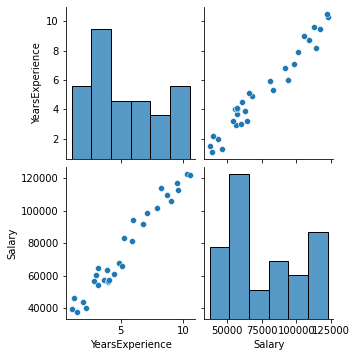

In [10]:
sns.pairplot(df)

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

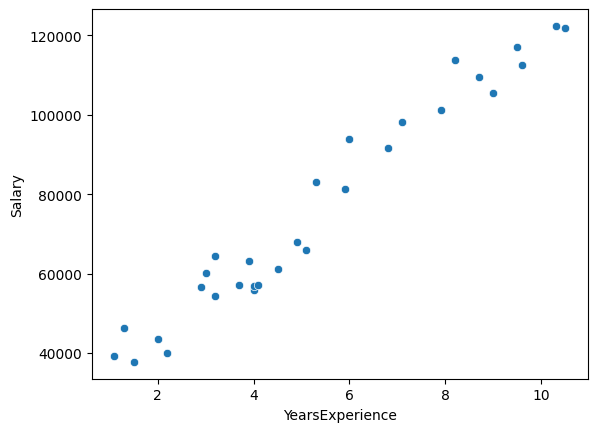

In [11]:
# eda
sns.scatterplot(x='YearsExperience',y='Salary',data=df)

- To check whether it is normally distributed or not

In [12]:
# sns.distplot(df['YearsExperience'])

<AxesSubplot:>

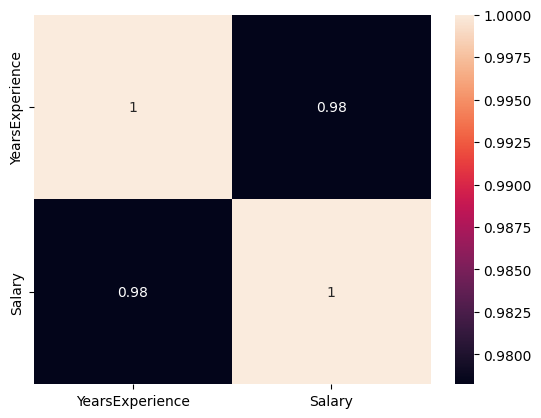

In [13]:
sns.heatmap(df.corr(),annot=True)

Which means the total_bill is highly correlated with the label (tip)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

- splitting the Data into X and y 

In [15]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

- Train Test split

In [16]:
# train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

- Creating and training data

In [17]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

- Model evaluation

In [18]:
# intercept
lr.intercept_

26780.09915062818

In [19]:
d_coef=pd.DataFrame(lr.coef_,X.columns,columns=['coef'])
d_coef

,coef
YearsExperience,9312.575127


- prediction

In [20]:
# model evaluation
y_pred=lr.predict(X_test)
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

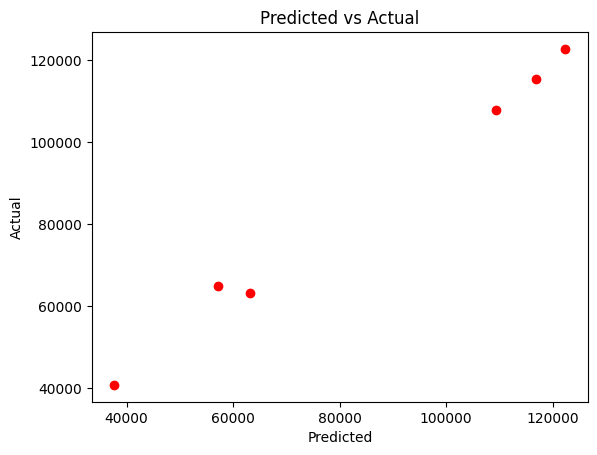

In [40]:
plt.scatter(y_test,y_pred,color='red')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs Actual')
plt.show()

- residual Histogram
  

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

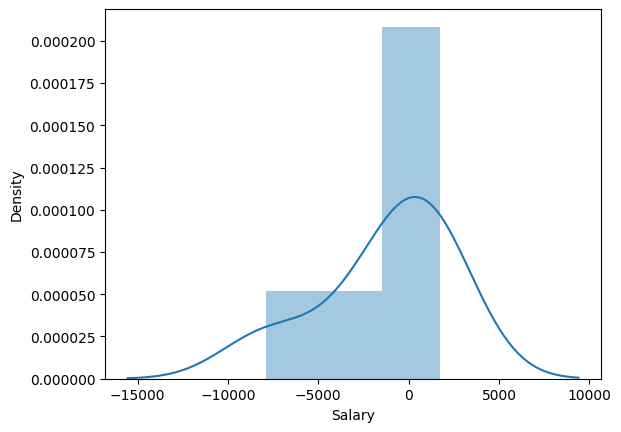

In [41]:
sns.distplot(y_test-y_pred)

- find accuracy

In [42]:
# find accuracy
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
r2_score(y_test,y_pred)


0.988169515729126

In [43]:
mean_squared_error(y_test,y_pred)

12823412.298126549

In [44]:

mean_absolute_error(y_test,y_pred)

2446.1723690465055

if you have 5 years of experiences

In [49]:
# predict salary for a new record
y_pred=lr.predict([[5]])
y_pred


c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([73342.97478427])